In [1]:
import numpy as np
import pandas as pd

In [14]:
data = pd.read_csv('lefthand_normal.csv',header = None)
data

,0,1,2,3,4,5,6,7,8,9
0,0.0228,0.000,0.000,0.000,171.0,5.65,-52.9,0.00000,0.000,0.000
1,0.0443,-0.061,-0.244,0.000,171.0,5.65,-52.9,-0.09720,0.156,-0.988
2,0.0614,-0.061,-0.244,0.000,171.0,5.65,-52.9,-0.09720,0.156,-0.988
3,0.0767,-0.061,0.000,0.000,171.0,5.65,-52.9,-0.09810,0.156,-0.988
4,0.0917,-0.061,0.000,0.000,171.0,5.65,-52.9,-0.09810,0.156,-0.988
...,...,...,...,...,...,...,...,...,...,...
3810,59.9000,-4.210,-7.260,0.244,168.0,-1.59,88.1,0.01170,0.205,-0.987
3811,59.9000,-12.200,-8.180,0.061,168.0,-1.52,87.6,0.01370,0.208,-0.966
3812,59.9000,-12.200,-8.180,0.061,168.0,-1.43,87.2,0.01370,0.208,-0.966
3813,60.0000,-14.600,-10.100,-0.244,167.0,-1.35,86.7,0.00928,0.223,-0.963


In [32]:
import matplotlib.pyplot as plt
data1 = data.iloc[:,1:]
data1.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
data1

,1,2,3,4,5,6,7,8,9
0,0.000,0.000,0.000,171.0,5.65,-52.9,0.00000,0.000,0.000
1,-0.061,-0.244,0.000,171.0,5.65,-52.9,-0.09720,0.156,-0.988
2,-0.061,-0.244,0.000,171.0,5.65,-52.9,-0.09720,0.156,-0.988
3,-0.061,0.000,0.000,171.0,5.65,-52.9,-0.09810,0.156,-0.988
4,-0.061,0.000,0.000,171.0,5.65,-52.9,-0.09810,0.156,-0.988
...,...,...,...,...,...,...,...,...,...
3810,-4.210,-7.260,0.244,168.0,-1.59,88.1,0.01170,0.205,-0.987
3811,-12.200,-8.180,0.061,168.0,-1.52,87.6,0.01370,0.208,-0.966
3812,-12.200,-8.180,0.061,168.0,-1.43,87.2,0.01370,0.208,-0.966
3813,-14.600,-10.100,-0.244,167.0,-1.35,86.7,0.00928,0.223,-0.963


In [34]:
mat = np.transpose(np.array(data1))
mat.shape

(9, 3815)

In [35]:
U,S,VT =np.linalg.svd(mat)

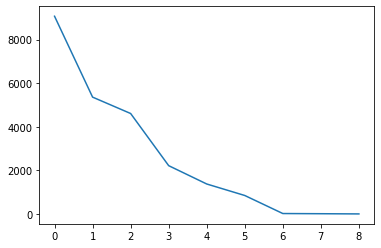

In [38]:
plt.plot(S)

In [39]:
VT.shape

(3815, 3815)

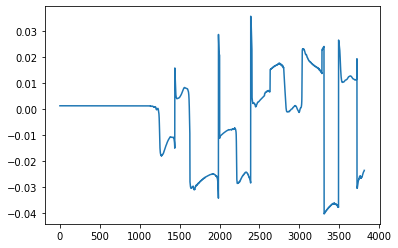

In [40]:
plt.plot(VT[1,:])

In [43]:
from scipy.fftpack import fft
import matplotlib.pyplot as plt

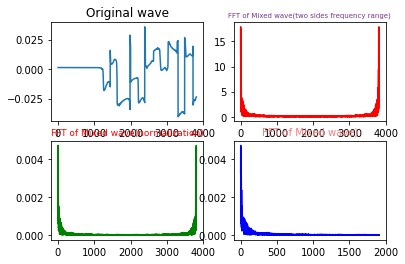

In [45]:
x = [i for i in range(3815)]
y = VT[1,:]
yy=fft(y)                     #快速傅里叶变换
yreal = yy.real               # 获取实数部分
yimag = yy.imag               # 获取虚数部分

yf=abs(fft(y))                # 取绝对值
yf1=abs(fft(y))/len(x)           #归一化处理
yf2 = yf1[range(int(len(x)/2))]  #由于对称性，只取一半区间

xf = np.arange(len(y))        # 频率
xf1 = xf
xf2 = xf[range(int(len(x)/2))]  #取一半区间


plt.subplot(221)
plt.plot(x[0:3815],y[0:3815])   
plt.title('Original wave')

plt.subplot(222)
plt.plot(xf,yf,'r')
plt.title('FFT of Mixed wave(two sides frequency range)',fontsize=7,color='#7A378B')  #注意这里的颜色可以查询颜色代码表

plt.subplot(223)
plt.plot(xf1,yf1,'g')
plt.title('FFT of Mixed wave(normalization)',fontsize=9,color='r')

plt.subplot(224)
plt.plot(xf2,yf2,'b')
plt.title('FFT of Mixed wave)',fontsize=10,color='#F08080')


plt.show()
